49


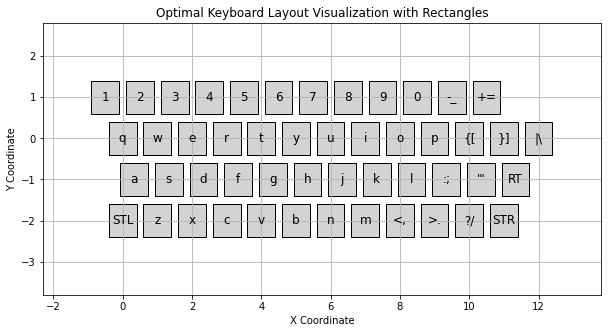

In [133]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def visualizeKeyboard(keyboard_layout):
    # Example keyboard layout with coordinates
    # Define key size
    key_width = 0.8
    key_height = 0.8

    # Create a plot
    fig, ax = plt.subplots(figsize=(10, 5))

    # Plot each key as a rectangle
    for char, (x, y) in keyboard_layout.items():
        # Create a rectangle for each key
        rect = patches.Rectangle((x - key_width/2, y - key_height/2), key_width, key_height, linewidth=1, edgecolor='black', facecolor='lightgray')
        ax.add_patch(rect)
        # Annotate the key with its character
        plt.text(x, y, char, fontsize=12, ha='center', va='center')

    # Set plot limits
    plt.xlim(min(x - key_width for x, y in keyboard_layout.values()) - 1, max(x + key_width for x, y in keyboard_layout.values()) + 1)
    plt.ylim(min(y - key_height for x, y in keyboard_layout.values()) - 1, max(y + key_height for x, y in keyboard_layout.values()) + 1)

    # Add labels and title
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Optimal Keyboard Layout Visualization with Rectangles')

    # Show grid and plot
    plt.grid(True)
    plt.show()

qwerty_layout = {
    '1': (-0.75, 1), '2': (0.25, 1), '3': (1.25, 1), '4': (2.25, 1), 
    '5': (3.25, 1), '6': (4.25, 1), '7': (5.25, 1), '8': (6.25, 1), 
    '9': (7.25, 1), '0': (8.25, 1), '-_': (9.25, 1), '+=': (10.25, 1), 
    'q': (0, 0),'w': (1, 0),'e': (2, 0),'r': (3, 0),'t': (4, 0),
    'y': (5, 0),'u': (6, 0),'i': (7, 0),'o': (8, 0),'p': (9, 0),
    '{[': (10, 0),'}]': (11, 0),'|\\': (12, 0),
    
    'a': (0, -1),'s': (1, -1),'d': (2, -1),'f': (3, -1),'g': (4, -1),
    'h': (5, -1),'j': (6, -1),'k': (7, -1),'l': (8, -1),':;': (9, -1),
    '"\'': (10, -1),'RT': (11, -1),
    
    'STL': (0, -2),'z': (1, -2),'x': (2,-2),'c': (3,-2),'v': (4,-2),
    'b': (5,-2), 'n': (6,-2), 'm': (7,-2), '<,': (8,-2), '>.': (9,-2),
    '?/': (10,-2), 'STR': (11,-2),
    # Add more keys as needed
}


def adjust_qwerty(keyboard_layout):
    count = 0
    for key in keyboard_layout:
        keyboard_layout[key] = list(keyboard_layout[key])
        if keyboard_layout[key][1] == 1:
            keyboard_layout[key][0] = keyboard_layout[key][0] + (1/4)
        if keyboard_layout[key][1] == -1:
            keyboard_layout[key][0] = keyboard_layout[key][0] + (1/3)
        if keyboard_layout[key][1] == -2:
            pass
        count += 1
    print(count)
    return keyboard_layout
        # print(keyboard_layout[key])
        # keyboard_layout[key][0] = keyboard_layout[key][0] + 0
        
qwerty_layout = adjust_qwerty(qwerty_layout)
visualizeKeyboard(qwerty_layout)

In [134]:
from collections import Counter
import string
import numpy as np

def combine_keys(hmap, c1, c2):
    hmap[c1 + c2] = hmap[c1] + hmap[c2]
    hmap.pop(c1)
    hmap.pop(c2)
    
    return hmap

def process_counter(counter):
    print(counter)
    counter = dict(counter)
    
    topop = "-_ += {[ }] |\ :; \"' <, >. ?/".split(" ")
    for cpair in topop:
        counter = combine_keys(counter, cpair[0], cpair[1])
    
    return counter

charlist = "0123456789abcdefghijklmnopqrstuvwxyz!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ 	 \n"
charlist = "1 2 3 4 5 6 7 8 9 0 - _ + = q w e r t y u i o p { [ } ] | \ a s d f g h j k l : ; \" ' \n z x c v b n m < , > . ? /".split(" ")
combined_charlist = "1 2 3 4 5 6 7 8 9 0 -_ += q w e r t y u i o p {[ }] |\ a s d f g h j k l :; \"' \n z x c v b n m <, >. ?/".split(" ")

def preprocess_file(filepath: str):
    with open(filepath) as f:
        filtered_string = ''.join([ch for ch in f.read().lower() if ch in charlist])
        filtered_string = filtered_string + "".join(charlist)
        data = Counter(filtered_string)
        
    data = process_counter(data)
   
    charlist_count = [data[c]-1 for c in combined_charlist]

    # print(list(charlist))
    return charlist_count


filepath = "./source_code_ex.txt"
charlist_count = np.array(preprocess_file(filepath))
print(charlist_count)
print(charlist_count.shape)
# charlist_count = process_counter(charlist_count)

Counter({'n': 396, 'o': 289, 'e': 257, ',': 193, 'r': 190, '\n': 169, 'a': 135, 'i': 131, 's': 121, 'd': 113, 't': 109, 'l': 85, 'b': 69, '_': 67, '=': 67, ':': 61, '[': 59, ']': 59, 'c': 54, 'f': 48, 'p': 46, 'u': 42, 'm': 25, "'": 23, '6': 23, '3': 22, '1': 21, '9': 21, 'h': 17, 'g': 15, 'y': 13, '"': 13, '8': 12, 'q': 12, '.': 12, 'v': 11, 'k': 11, 'j': 10, '5': 10, '7': 10, 'w': 10, '4': 9, '+': 8, '|': 8, '-': 8, '2': 7, '0': 6, '>': 4, 'x': 3, ';': 2, '\\': 2, '/': 2, '{': 2, '}': 2, 'z': 1, '<': 1, '?': 1})
[ 20   6  21   8   9  22   9  11  20   5  74  74  11   9 256 189 108  12
  41 130 288  45  60  60   9 134 120 112  47  14  16   9  10  84  62  35
 168   0   2  53  10  68 395  24 193  15   2]
(47,)


3434.4058680759317


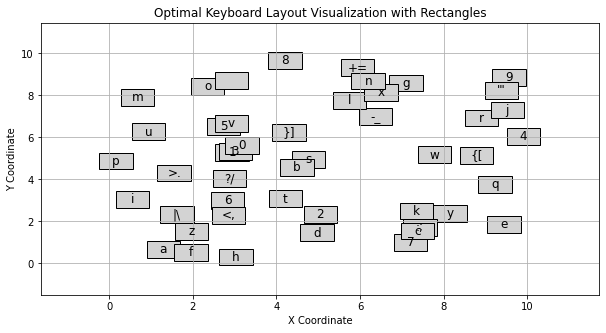

Iteration 0, Loss: 3434.4058680759317
Iteration 100, Loss: 3403.1009818482657
Iteration 200, Loss: 3374.9686854833953
Iteration 300, Loss: 3349.654331774728
Iteration 400, Loss: 3326.8467059952577
Iteration 500, Loss: 3306.2643414278236
Iteration 600, Loss: 3287.657354462667
Iteration 700, Loss: 3270.8165622645015
Iteration 800, Loss: 3255.55519584142
Iteration 900, Loss: 3241.7008270490046
Iteration 1000, Loss: 3229.1114444855443
Iteration 1100, Loss: 3217.660203620174
Iteration 1200, Loss: 3207.2323040550978
Iteration 1300, Loss: 3197.725498212056
Iteration 1400, Loss: 3189.048236803176
Iteration 1500, Loss: 3181.118871736993
Iteration 1600, Loss: 3173.865686809603
Iteration 1700, Loss: 3167.224770974591
Iteration 1800, Loss: 3161.1386211870704
Iteration 1900, Loss: 3155.5556144522466
Iteration 2000, Loss: 3150.4294351327385
Iteration 2100, Loss: 3145.718492508543
Iteration 2200, Loss: 3141.3853898440025
Iteration 2300, Loss: 3137.3964737292035
Iteration 2400, Loss: 3133.721476764367

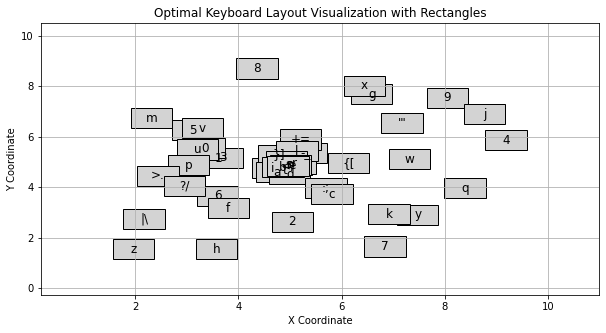

In [135]:
import numpy as np

NUM_KEYS = 47
LRATE = 0.000001
MIN_DISTANCE = 10
PENALTY_TERM = 0.03

def initialize_layout():
    x = np.random.rand(NUM_KEYS)
    y = np.random.rand(NUM_KEYS)
    
    return x, y

def build_layout_hash(x, y, combined_charlist):
    layout_hash = {}
    for c, x, y in zip(combined_charlist, x, y):
        layout_hash[c] = (x, y)
    
    return layout_hash

def loss(char_count, x, y):
    x_dist = (x - (np.ones(x.shape[0]) * np.average(x)))**2
    y_dist = (y - (np.ones(y.shape[0]) * np.average(y)))**2
    
    total_dist = x_dist + y_dist
    
    loss = np.dot(char_count, total_dist)
    
    for i in range(len(x)):
        for j in range(i+1, len(x)):
            distance = np.sqrt((x[i] - x[j])**2 + (y[i] - y[j])**2)
            if distance < MIN_DISTANCE:
                loss += PENALTY_TERM * (MIN_DISTANCE - distance)**2
    
    return loss

def gradient(charlist_count, x, y):
    x_grad = np.multiply(2 * (x - (np.ones(x.shape[0]) * np.average(x))), charlist_count)
    y_grad = np.multiply(2 * (y - (np.ones(y.shape[0]) * np.average(y))), charlist_count)
    
    return x_grad, y_grad
    

x, y = initialize_layout()
print(loss(charlist_count, x, y))

layout_hash = build_layout_hash(x * 10, y * 10, combined_charlist)
visualizeKeyboard(layout_hash)
# print(layout_hash)
# print(gradient(charlist_count, x, y))

losses = []
x_grads = []
y_grads = []
x_poses = []
y_poses = []
for iteration in range(10000):  # Number of iterations
    # Calculate the current loss
    curr_loss = loss(charlist_count, x, y)
    losses.append(curr_loss)
    
    # Calculate the gradient
    grad_X, grad_Y = gradient(charlist_count, x, y)
    x_grads.append(grad_X)
    y_grads.append(grad_Y)
    
    x -= LRATE * grad_X
    y -= LRATE * grad_Y
    
    # Print the current loss every 100 iterations
    if iteration % 100 == 0:
        print(f"Iteration {iteration}, Loss: {curr_loss}")

layout_hash = build_layout_hash(x * 10, y * 10, combined_charlist)
# print(layout_hash)
visualizeKeyboard(layout_hash)

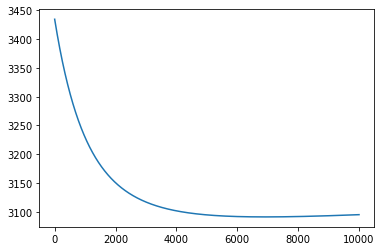

In [136]:
plt.plot(losses)